#Análisis de los datos

El dataset dele estar limpio.

## 1. Análisis exploratorio
# Llamamos librerías e importamos el dataSet limpio.

In [360]:
#Procesamiento
import pandas as pd
import numpy as np
#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [361]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
ruta = '/content/drive/MyDrive/Hackaton/Dataset_Talento_limpio.csv'
dataSet = pd.read_csv(ruta)
dataSet

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,fallo_detectado,tipo_fallo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-01-01 00:00:00,noche,op_16,m_8,p_14,74.200401,0.502242,45.209387,106.356684,no,no clasificado,108,3,87.021704,13.131580,0,1,sin observaciones
1,2023-01-01 01:00:00,mañana,op_18,m_8,p_12,85.886727,0.481294,52.623286,106.147220,sí,eléctrico,86,2,81.200758,13.348221,0,0,sin observaciones
2,2023-01-01 02:00:00,noche,op_5,m_7,p_14,81.293588,0.446638,48.538203,122.517733,no,no clasificado,103,0,79.104477,15.461715,3,0,operación normal
3,2023-01-01 03:00:00,noche,op_4,m_6,p_15,75.697975,0.576969,55.597781,123.641235,no,no clasificado,104,2,84.176537,16.156453,4,0,sin observaciones
4,2023-01-01 04:00:00,mañana,op_13,m_6,p_7,69.887504,0.716240,63.837428,126.276992,no,no clasificado,119,1,93.535084,12.573939,0,0,operación normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-09-07 19:00:00,mañana,op_7,m_9,p_2,69.566198,0.359394,31.452299,110.456904,no,no clasificado,85,6,83.359399,17.467713,1,0,sin observaciones
5996,2023-09-07 20:00:00,tarde,op_16,m_9,p_1,72.509325,0.387216,45.429609,145.575235,no,no clasificado,109,4,87.847138,11.850616,0,0,sin observaciones
5997,2023-09-07 21:00:00,noche,op_3,m_7,p_11,72.452851,0.551448,27.774960,74.620786,no,no clasificado,109,0,84.972214,15.104971,1,1,revisar calibración
5998,2023-09-07 22:00:00,tarde,op_7,m_6,p_1,74.236404,0.429883,41.528769,111.656062,no,no clasificado,101,3,87.225639,17.073040,0,0,sin observaciones


###Descripción del problema

Haremos un análisis que busque encontrar la relación que hay entre la eficiencia_porcentual y las demás variables. la pregunta es ¿cómo podemos predecir la eficiencia porcentual de una máquina desde las otras variables?

###Análisis exploratorio

Revisando las columnas que no aportan al problema, encontramos que las columnas de fallo_detectad y de tipo_fallo no concuerdan, existen filas que nombran un tipo_fallo 'mecánico' o 'eléctrico' pero fallo_detectado es 'no', este tipo de incongruencias no permite que haya credibilidad en la forma en la que se validan y se documentan estos fallos, por ende eliminaremos esas dos variables.

In [363]:
dataSet = dataSet.drop(columns=['fallo_detectado','tipo_fallo'], axis=1)
dataSet

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-01-01 00:00:00,noche,op_16,m_8,p_14,74.200401,0.502242,45.209387,106.356684,108,3,87.021704,13.131580,0,1,sin observaciones
1,2023-01-01 01:00:00,mañana,op_18,m_8,p_12,85.886727,0.481294,52.623286,106.147220,86,2,81.200758,13.348221,0,0,sin observaciones
2,2023-01-01 02:00:00,noche,op_5,m_7,p_14,81.293588,0.446638,48.538203,122.517733,103,0,79.104477,15.461715,3,0,operación normal
3,2023-01-01 03:00:00,noche,op_4,m_6,p_15,75.697975,0.576969,55.597781,123.641235,104,2,84.176537,16.156453,4,0,sin observaciones
4,2023-01-01 04:00:00,mañana,op_13,m_6,p_7,69.887504,0.716240,63.837428,126.276992,119,1,93.535084,12.573939,0,0,operación normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-09-07 19:00:00,mañana,op_7,m_9,p_2,69.566198,0.359394,31.452299,110.456904,85,6,83.359399,17.467713,1,0,sin observaciones
5996,2023-09-07 20:00:00,tarde,op_16,m_9,p_1,72.509325,0.387216,45.429609,145.575235,109,4,87.847138,11.850616,0,0,sin observaciones
5997,2023-09-07 21:00:00,noche,op_3,m_7,p_11,72.452851,0.551448,27.774960,74.620786,109,0,84.972214,15.104971,1,1,revisar calibración
5998,2023-09-07 22:00:00,tarde,op_7,m_6,p_1,74.236404,0.429883,41.528769,111.656062,101,3,87.225639,17.073040,0,0,sin observaciones


Ahora convertiremos la variable timestamp en 9 rangos (meses).

In [364]:
# Asegúrate de que la columna 'timestamp' sea de tipo datetime
dataSet['timestamp'] = pd.to_datetime(dataSet['timestamp'])

# Formatear como 'Año-NombreMes' (por ejemplo: 2023-Enero)
dataSet['timestamp'] = dataSet['timestamp'].dt.strftime('%Y-%B')

dataSet

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,cantidad_producida,unidades_defectuosas,eficiencia_porcentual,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones
0,2023-January,noche,op_16,m_8,p_14,74.200401,0.502242,45.209387,106.356684,108,3,87.021704,13.131580,0,1,sin observaciones
1,2023-January,mañana,op_18,m_8,p_12,85.886727,0.481294,52.623286,106.147220,86,2,81.200758,13.348221,0,0,sin observaciones
2,2023-January,noche,op_5,m_7,p_14,81.293588,0.446638,48.538203,122.517733,103,0,79.104477,15.461715,3,0,operación normal
3,2023-January,noche,op_4,m_6,p_15,75.697975,0.576969,55.597781,123.641235,104,2,84.176537,16.156453,4,0,sin observaciones
4,2023-January,mañana,op_13,m_6,p_7,69.887504,0.716240,63.837428,126.276992,119,1,93.535084,12.573939,0,0,operación normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-September,mañana,op_7,m_9,p_2,69.566198,0.359394,31.452299,110.456904,85,6,83.359399,17.467713,1,0,sin observaciones
5996,2023-September,tarde,op_16,m_9,p_1,72.509325,0.387216,45.429609,145.575235,109,4,87.847138,11.850616,0,0,sin observaciones
5997,2023-September,noche,op_3,m_7,p_11,72.452851,0.551448,27.774960,74.620786,109,0,84.972214,15.104971,1,1,revisar calibración
5998,2023-September,tarde,op_7,m_6,p_1,74.236404,0.429883,41.528769,111.656062,101,3,87.225639,17.073040,0,0,sin observaciones


Revisaremos los rangos de los datos de las variables numéricas.

In [365]:
data_Floats = dataSet.select_dtypes(include=['float64'])
data_Floats

,temperatura,vibración,humedad,tiempo_ciclo,eficiencia_porcentual,consumo_energia
0,74.200401,0.502242,45.209387,106.356684,87.021704,13.131580
1,85.886727,0.481294,52.623286,106.147220,81.200758,13.348221
2,81.293588,0.446638,48.538203,122.517733,79.104477,15.461715
3,75.697975,0.576969,55.597781,123.641235,84.176537,16.156453
4,69.887504,0.716240,63.837428,126.276992,93.535084,12.573939
...,...,...,...,...,...,...
5995,69.566198,0.359394,31.452299,110.456904,83.359399,17.467713
5996,72.509325,0.387216,45.429609,145.575235,87.847138,11.850616
5997,72.452851,0.551448,27.774960,74.620786,84.972214,15.104971
5998,74.236404,0.429883,41.528769,111.656062,87.225639,17.073040


In [366]:
data_Floats.min(numeric_only=True)

,0
temperatura,57.900924
vibración,0.052148
humedad,0.345502
tiempo_ciclo,53.707495
eficiencia_porcentual,66.650206
consumo_energia,3.693371


In [367]:
data_Floats.max(numeric_only=True)

,0
temperatura,95.739475
vibración,0.832678
humedad,81.402316
tiempo_ciclo,201.989007
eficiencia_porcentual,102.024829
consumo_energia,26.699891


Organizaremos estas variables en 8 rangos cada una

In [368]:
# 1. Selecciona solo columnas float
float_cols = data_Floats.columns

# 2. Número de rangos (bins)
n = 8

# 3. Itera sobre cada columna float
for col in float_cols:
    min_val = dataSet[col].min()
    max_val = dataSet[col].max()

    # Evita columnas constantes
    if min_val == max_val:
        continue

    # Crea los bins uniformes
    bins = np.linspace(min_val, max_val, n + 1)

    # Crea la nueva columna con rangos
    dataSet[f'{col}_rango'] = pd.cut(dataSet[col], bins=bins, include_lowest=True)
# Llamamos el dataSet
dataSet

,timestamp,turno,operador_id,maquina_id,producto_id,temperatura,vibración,humedad,tiempo_ciclo,cantidad_producida,...,consumo_energia,paradas_programadas,paradas_imprevistas,observaciones,temperatura_rango,vibración_rango,humedad_rango,tiempo_ciclo_rango,eficiencia_porcentual_rango,consumo_energia_rango
0,2023-January,noche,op_16,m_8,p_14,74.200401,0.502242,45.209387,106.356684,108,...,13.131580,0,1,sin observaciones,"(72.09, 76.82]","(0.442, 0.54]","(40.874, 51.006]","(90.778, 109.313]","(84.338, 88.759]","(12.321, 15.197]"
1,2023-January,mañana,op_18,m_8,p_12,85.886727,0.481294,52.623286,106.147220,86,...,13.348221,0,0,sin observaciones,"(81.55, 86.28]","(0.442, 0.54]","(51.006, 61.138]","(90.778, 109.313]","(79.916, 84.338]","(12.321, 15.197]"
2,2023-January,noche,op_5,m_7,p_14,81.293588,0.446638,48.538203,122.517733,103,...,15.461715,3,0,operación normal,"(76.82, 81.55]","(0.442, 0.54]","(40.874, 51.006]","(109.313, 127.848]","(75.494, 79.916]","(15.197, 18.072]"
3,2023-January,noche,op_4,m_6,p_15,75.697975,0.576969,55.597781,123.641235,104,...,16.156453,4,0,sin observaciones,"(72.09, 76.82]","(0.54, 0.638]","(51.006, 61.138]","(109.313, 127.848]","(79.916, 84.338]","(15.197, 18.072]"
4,2023-January,mañana,op_13,m_6,p_7,69.887504,0.716240,63.837428,126.276992,119,...,12.573939,0,0,operación normal,"(67.361, 72.09]","(0.638, 0.735]","(61.138, 71.27]","(109.313, 127.848]","(93.181, 97.603]","(12.321, 15.197]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2023-September,mañana,op_7,m_9,p_2,69.566198,0.359394,31.452299,110.456904,85,...,17.467713,1,0,sin observaciones,"(67.361, 72.09]","(0.345, 0.442]","(30.742, 40.874]","(109.313, 127.848]","(79.916, 84.338]","(15.197, 18.072]"
5996,2023-September,tarde,op_16,m_9,p_1,72.509325,0.387216,45.429609,145.575235,109,...,11.850616,0,0,sin observaciones,"(72.09, 76.82]","(0.345, 0.442]","(40.874, 51.006]","(127.848, 146.383]","(84.338, 88.759]","(9.445, 12.321]"
5997,2023-September,noche,op_3,m_7,p_11,72.452851,0.551448,27.774960,74.620786,109,...,15.104971,1,1,revisar calibración,"(72.09, 76.82]","(0.54, 0.638]","(20.61, 30.742]","(72.243, 90.778]","(84.338, 88.759]","(12.321, 15.197]"
5998,2023-September,tarde,op_7,m_6,p_1,74.236404,0.429883,41.528769,111.656062,101,...,17.073040,0,0,sin observaciones,"(72.09, 76.82]","(0.345, 0.442]","(40.874, 51.006]","(109.313, 127.848]","(84.338, 88.759]","(15.197, 18.072]"


In [369]:
dataSet_Rangos = dataSet.drop(
['temperatura',
'vibración',
'humedad',
'tiempo_ciclo',
'eficiencia_porcentual',
'consumo_energia'], axis=1)

for col in dataSet_Rangos:
  print(f'Columna {col}: {dataSet_Rangos[col].nunique()} subniveles')

Columna timestamp: 9 subniveles
Columna turno: 3 subniveles
Columna operador_id: 20 subniveles
Columna maquina_id: 10 subniveles
Columna producto_id: 15 subniveles
Columna cantidad_producida: 69 subniveles
Columna unidades_defectuosas: 10 subniveles
Columna paradas_programadas: 7 subniveles
Columna paradas_imprevistas: 6 subniveles
Columna observaciones: 4 subniveles
Columna temperatura_rango: 8 subniveles
Columna vibración_rango: 8 subniveles
Columna humedad_rango: 8 subniveles
Columna tiempo_ciclo_rango: 8 subniveles
Columna eficiencia_porcentual_rango: 8 subniveles
Columna consumo_energia_rango: 8 subniveles


Comenzamos a comparar la variable eficiencia_porcentual_Rango con las demás variables.

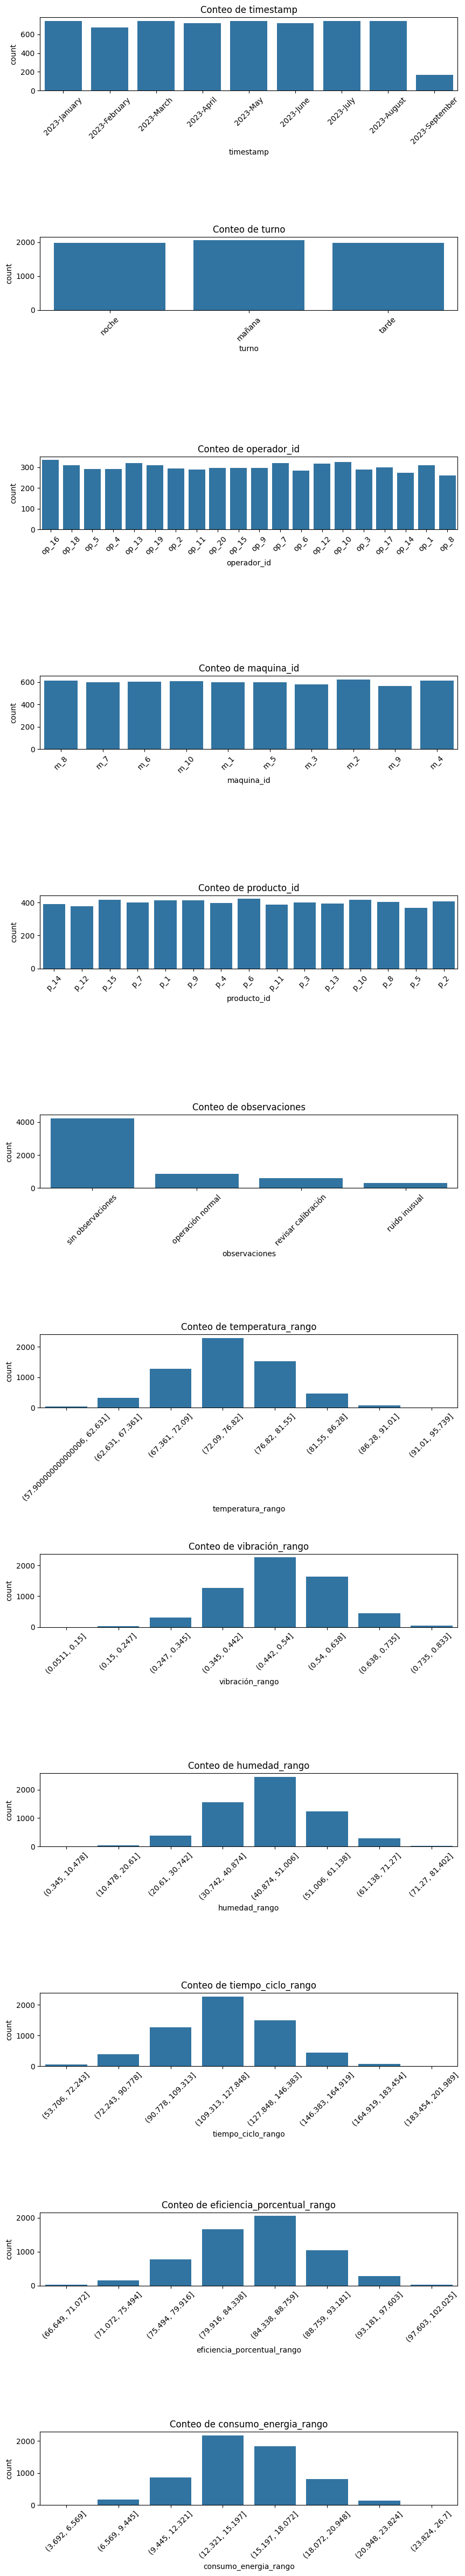

In [370]:
# 1. Detectar columnas categóricas automáticamente (tipo 'object' o 'category')
cat_cols = dataSet.select_dtypes(include=['object', 'category']).columns

# 2. Crear subplots
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 5 * len(cat_cols)))
fig.subplots_adjust(hspace=2)

# 3. Dibujar gráficos de barras para cada variable categórica
for i, col in enumerate(cat_cols):
    sns.countplot(data=dataSet, x=col, ax=axes[i])
    axes[i].set_title(f'Conteo de {col}')
    axes[i].tick_params(axis='x', rotation=45)

Podemos ver que existen variables como timestamp, turno y operador_id, que son constantes y relacionadas con el tiempo (han sido planificadas), y hay variables que siguen una distribución Gaussiana; estas últimas son datos específicos del funcionamiento que no tienen relación con la planificación a simple vista.

Generaremos análisis univariado respecto a la variable eficiencia_porcentual_rango. Primero haremos una matriz de correlación.

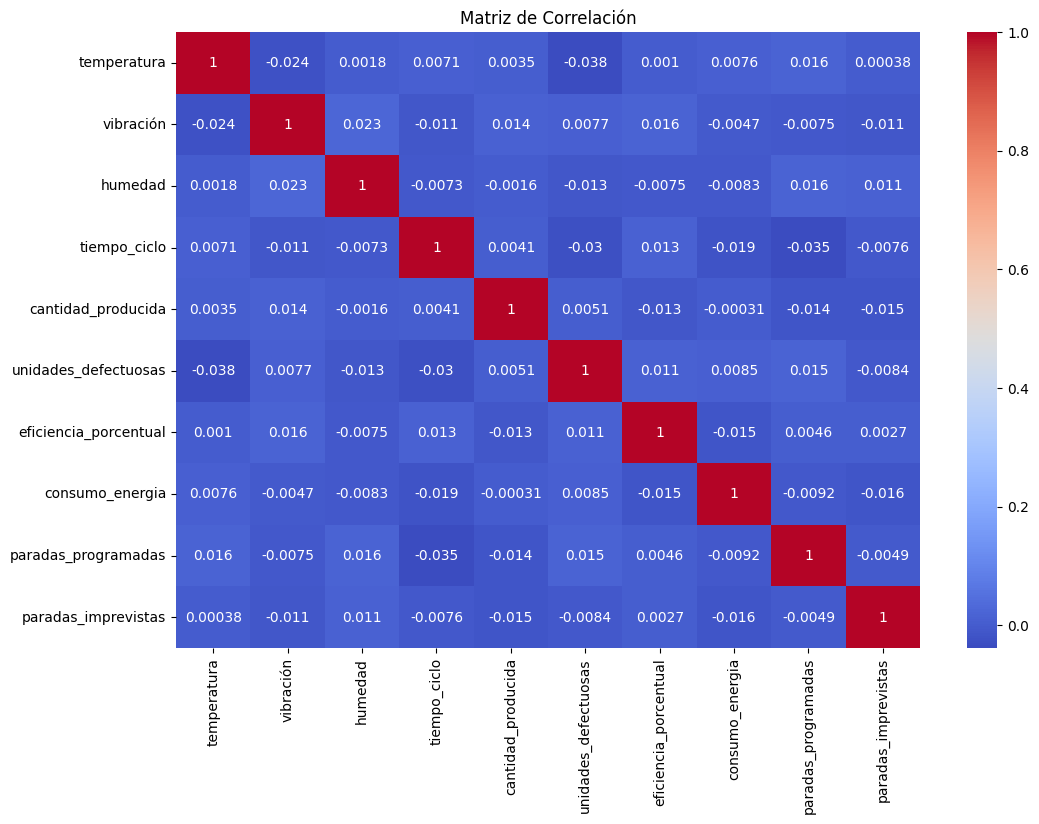

In [371]:
corr = dataSet.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación no muestra relaciones evidentes entre variables numéricas.

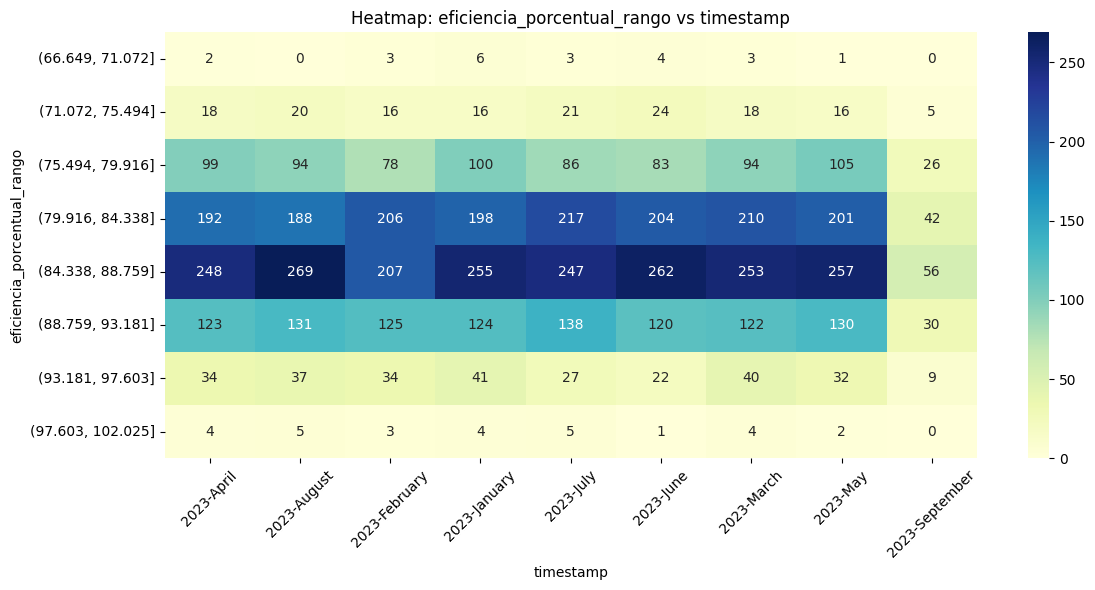

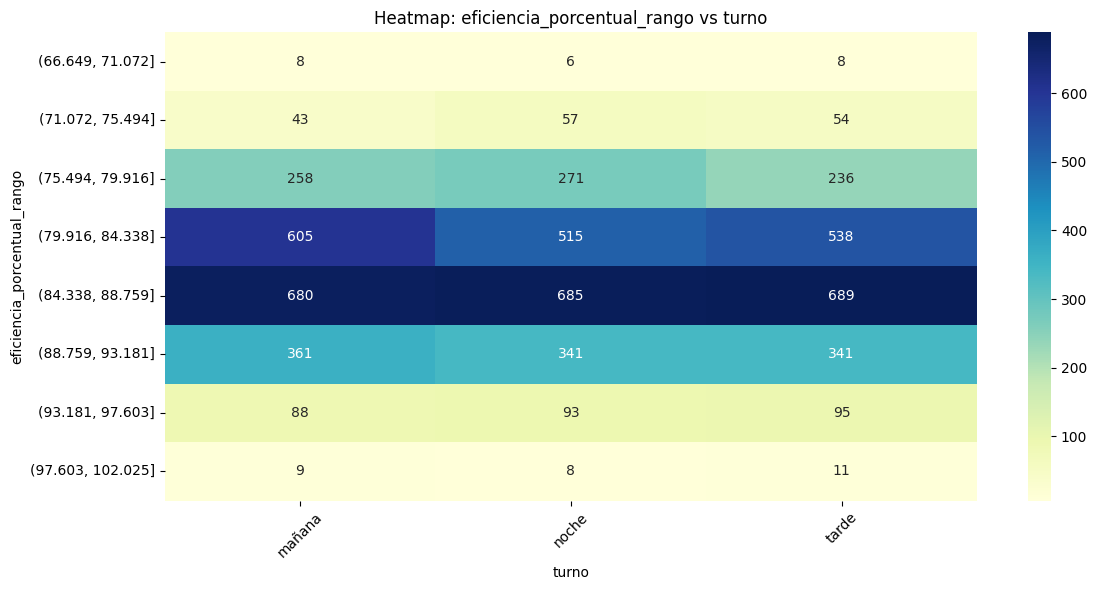

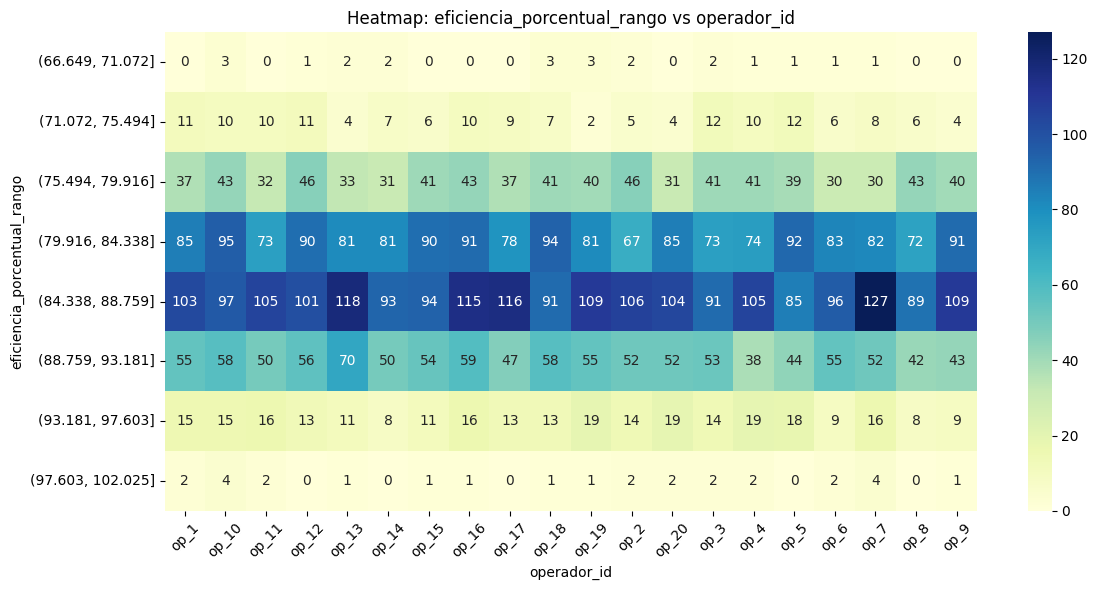

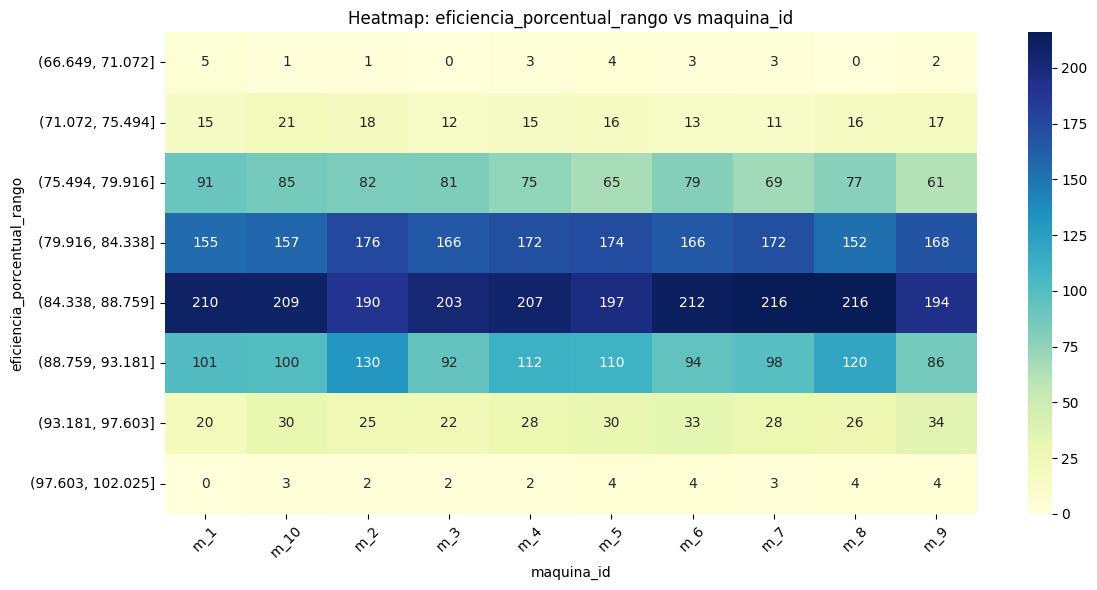

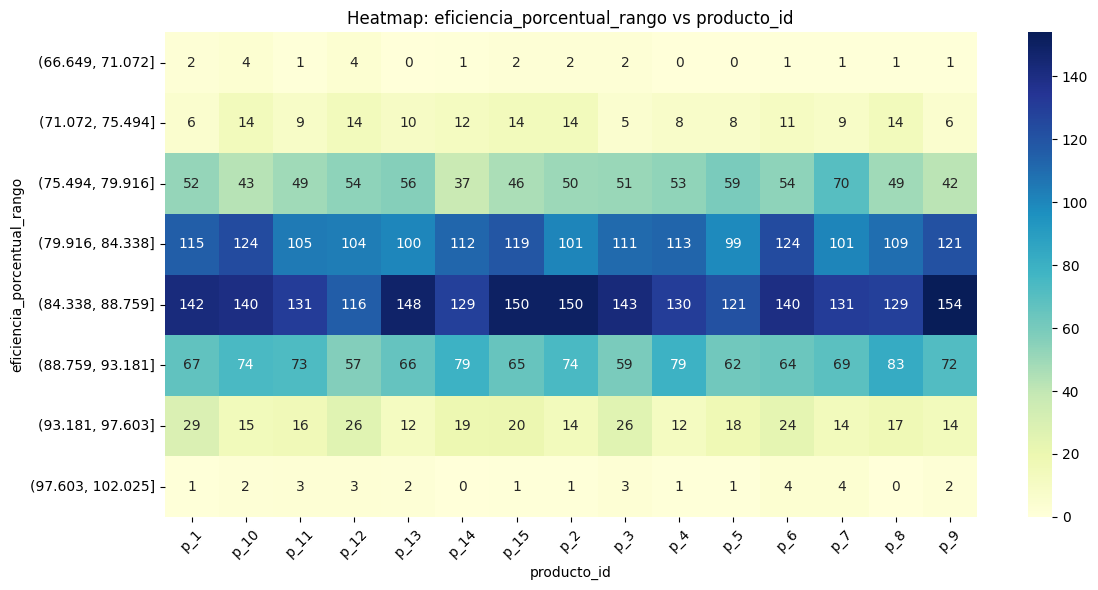

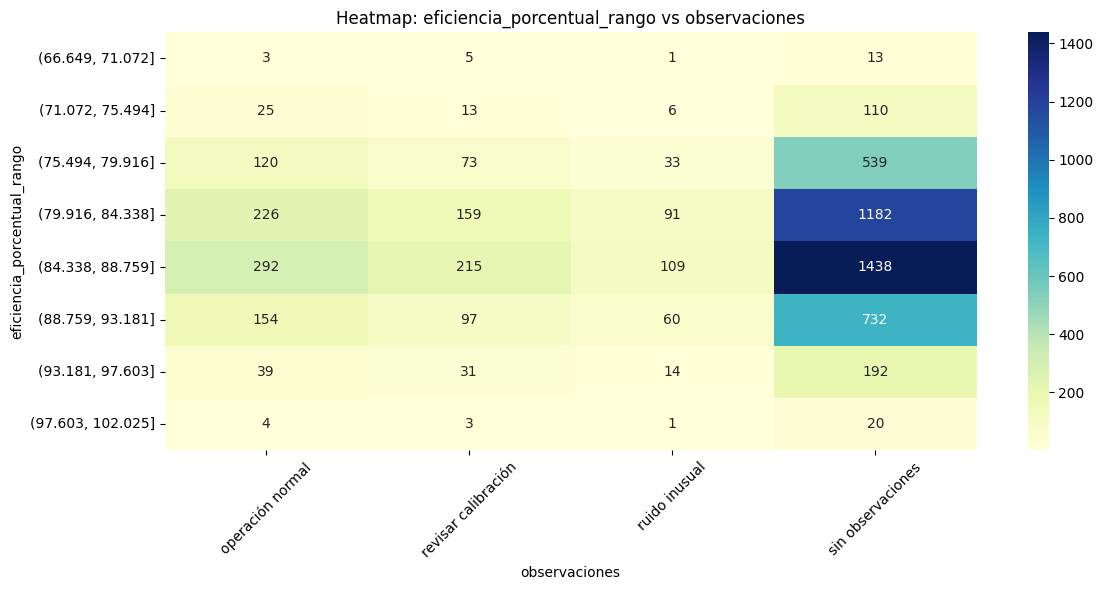

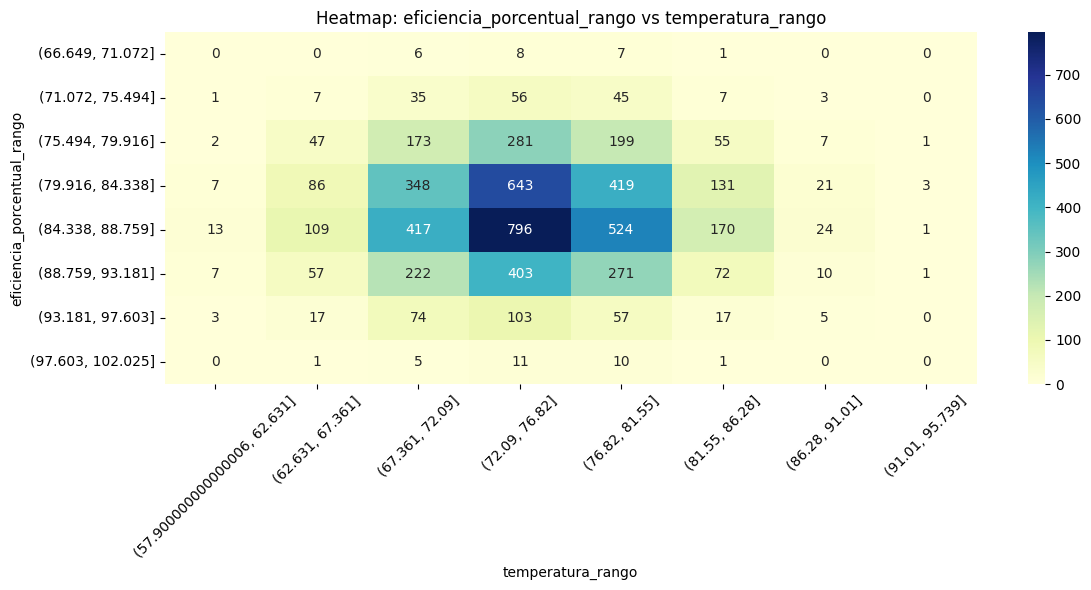

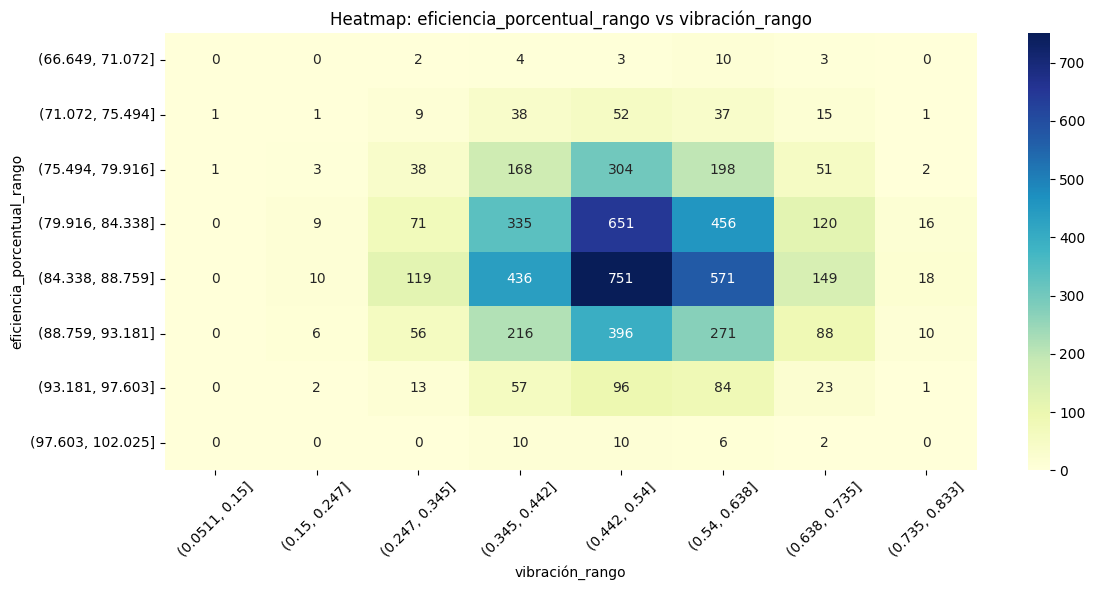

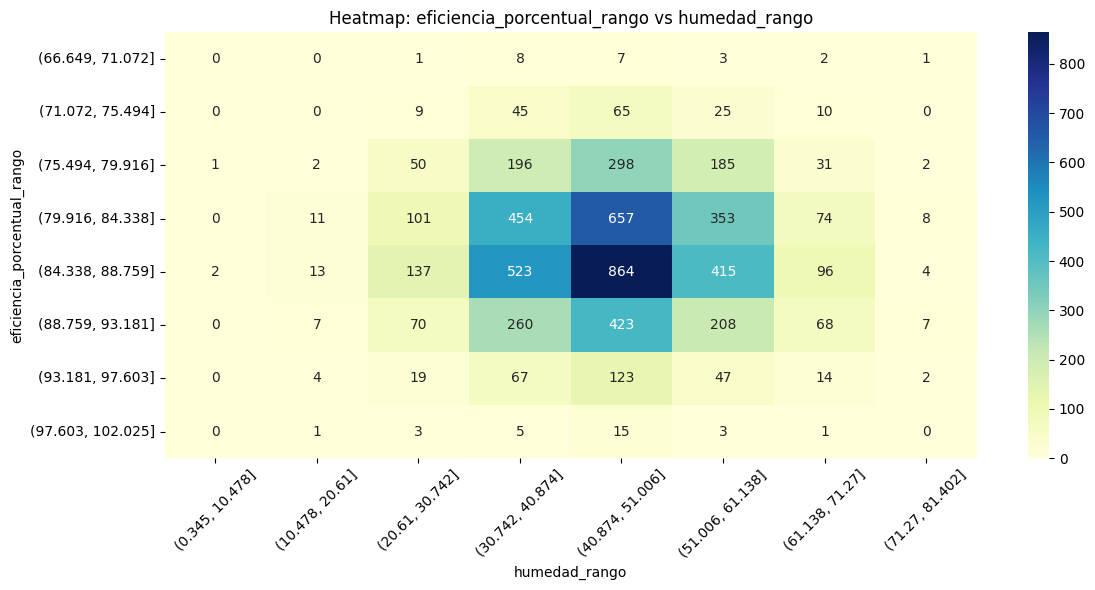

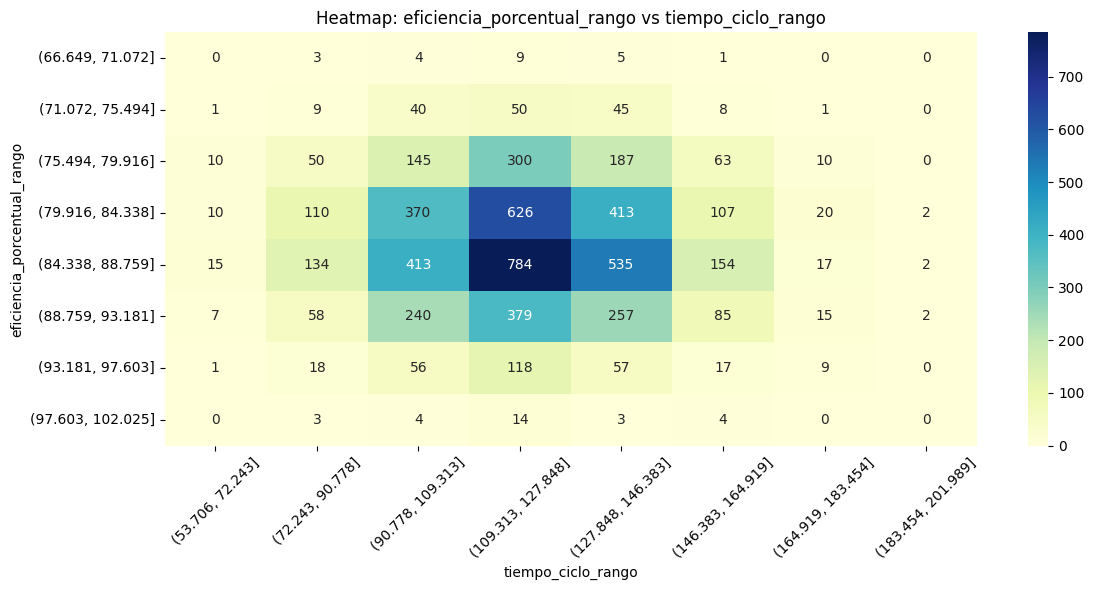

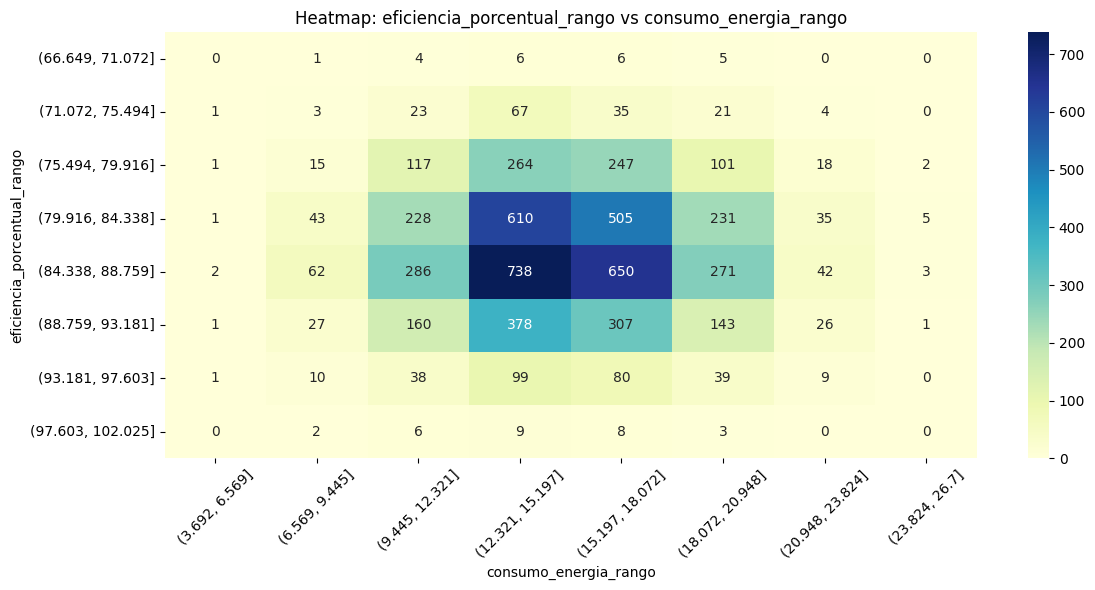

In [372]:
cat_cols = dataSet.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if col != 'eficiencia_porcentual_rango']

for col in cat_cols:
    tabla = pd.crosstab(dataSet['eficiencia_porcentual_rango'], dataSet[col])

    plt.figure(figsize=(12, 6))
    sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Heatmap: eficiencia_porcentual_rango vs {col}')
    plt.xlabel(col)
    plt.ylabel('eficiencia_porcentual_rango')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Según los datos, las variables de timestampt, turno, operador_id, maquina_id y producto_id no tienen inferencia con la variable objetivo eficiencia_porcentual_rango, por ende, serán eliminadas del dataSet, también eliminaremos los rangos para poder comenzar con la regresión lineal.


In [373]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   timestamp                    6000 non-null   object  
 1   turno                        6000 non-null   object  
 2   operador_id                  6000 non-null   object  
 3   maquina_id                   6000 non-null   object  
 4   producto_id                  6000 non-null   object  
 5   temperatura                  6000 non-null   float64 
 6   vibración                    6000 non-null   float64 
 7   humedad                      6000 non-null   float64 
 8   tiempo_ciclo                 6000 non-null   float64 
 9   cantidad_producida           6000 non-null   int64   
 10  unidades_defectuosas         6000 non-null   int64   
 11  eficiencia_porcentual        6000 non-null   float64 
 12  consumo_energia              6000 non-null   float64 
 13  par

##Regresión lineal

In [374]:
# Selecciona sólo columnas numéricas
data_num = dataSet.select_dtypes(include=['float64', 'int64'])

# Verifica las columnas que tienes
print(data_num.columns.tolist())

['temperatura', 'vibración', 'humedad', 'tiempo_ciclo', 'cantidad_producida', 'unidades_defectuosas', 'eficiencia_porcentual', 'consumo_energia', 'paradas_programadas', 'paradas_imprevistas']


In [375]:
# Definir la variable objetivo
y = data_num['eficiencia_porcentual']

# Eliminar la columna objetivo del conjunto de entrada
X = data_num.drop(columns=['eficiencia_porcentual'])

In [376]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [377]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [378]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)

print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("R² (explicación de la varianza):", r2_score(y_test, y_pred))


Error cuadrático medio (MSE): 24.636628542450033
R² (explicación de la varianza): -0.0057059758247188785


In [379]:
import pandas as pd

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(coeficientes)


               Variable  Coeficiente
1             vibración     0.711893
8   paradas_imprevistas    -0.032335
5  unidades_defectuosas     0.027549
2               humedad    -0.006590
4    cantidad_producida    -0.006075
7   paradas_programadas    -0.006027
3          tiempo_ciclo     0.005233
0           temperatura     0.002035
6       consumo_energia    -0.001636


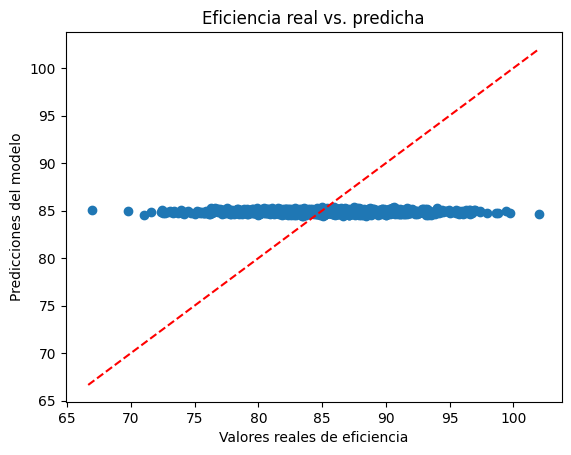

In [380]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales de eficiencia")
plt.ylabel("Predicciones del modelo")
plt.title("Eficiencia real vs. predicha")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [397]:
dataSet_encoded = pd.get_dummies(dataSet, columns=['timestamp', 'turno', 'operador_id', 'maquina_id', 'producto_id'], drop_first=True)
# Convert all boolean columns to integers
bool_cols = dataSet_encoded.select_dtypes(include='bool').columns

dataSet_encoded[bool_cols] = dataSet_encoded[bool_cols].astype(int)
dataSet_encoded.drop(columns=[
    "temperatura",
    "vibración",
    "humedad",
    "tiempo_ciclo",
    "cantidad_producida",
    "unidades_defectuosas",
    "consumo_energia",
    "paradas_programadas",
    "paradas_imprevistas",
], inplace=True)
dataSet_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   eficiencia_porcentual        6000 non-null   float64 
 1   observaciones                6000 non-null   object  
 2   temperatura_rango            6000 non-null   category
 3   vibración_rango              6000 non-null   category
 4   humedad_rango                6000 non-null   category
 5   tiempo_ciclo_rango           6000 non-null   category
 6   eficiencia_porcentual_rango  6000 non-null   category
 7   consumo_energia_rango        6000 non-null   category
 8   timestamp_2023-August        6000 non-null   int64   
 9   timestamp_2023-February      6000 non-null   int64   
 10  timestamp_2023-January       6000 non-null   int64   
 11  timestamp_2023-July          6000 non-null   int64   
 12  timestamp_2023-June          6000 non-null   int64   
 13  tim

In [382]:
# Selecciona sólo columnas numéricas
data_num = dataSet_encoded.select_dtypes(include=['float64', 'int64'])

# Verifica las columnas que tienes
print(data_num.columns.tolist())

['eficiencia_porcentual', 'timestamp_2023-August', 'timestamp_2023-February', 'timestamp_2023-January', 'timestamp_2023-July', 'timestamp_2023-June', 'timestamp_2023-March', 'timestamp_2023-May', 'timestamp_2023-September', 'turno_noche', 'turno_tarde', 'operador_id_op_10', 'operador_id_op_11', 'operador_id_op_12', 'operador_id_op_13', 'operador_id_op_14', 'operador_id_op_15', 'operador_id_op_16', 'operador_id_op_17', 'operador_id_op_18', 'operador_id_op_19', 'operador_id_op_2', 'operador_id_op_20', 'operador_id_op_3', 'operador_id_op_4', 'operador_id_op_5', 'operador_id_op_6', 'operador_id_op_7', 'operador_id_op_8', 'operador_id_op_9', 'maquina_id_m_10', 'maquina_id_m_2', 'maquina_id_m_3', 'maquina_id_m_4', 'maquina_id_m_5', 'maquina_id_m_6', 'maquina_id_m_7', 'maquina_id_m_8', 'maquina_id_m_9', 'producto_id_p_10', 'producto_id_p_11', 'producto_id_p_12', 'producto_id_p_13', 'producto_id_p_14', 'producto_id_p_15', 'producto_id_p_2', 'producto_id_p_3', 'producto_id_p_4', 'producto_id_p_

In [383]:
# Definir la variable objetivo
y = data_num['eficiencia_porcentual']

# Eliminar la columna objetivo del conjunto de entrada
X = data_num.drop(columns=['eficiencia_porcentual'])

In [384]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [385]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [386]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test)

print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("R² (explicación de la varianza):", r2_score(y_test, y_pred))


Error cuadrático medio (MSE): 25.19722554793699
R² (explicación de la varianza): -0.028590428438688642


In [387]:
import pandas as pd

coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(coeficientes)


                    Variable  Coeficiente
49           producto_id_p_7    -0.842896
40          producto_id_p_12    -0.813042
36            maquina_id_m_8     0.808360
10         operador_id_op_10    -0.684693
43          producto_id_p_15    -0.665080
34            maquina_id_m_6     0.655190
28          operador_id_op_9    -0.640299
38          producto_id_p_10    -0.633136
32            maquina_id_m_4     0.599113
46           producto_id_p_4    -0.593790
33            maquina_id_m_5     0.579608
47           producto_id_p_5    -0.574501
37            maquina_id_m_9     0.554431
15         operador_id_op_15    -0.543823
27          operador_id_op_8    -0.491439
12         operador_id_op_12    -0.489876
41          producto_id_p_13    -0.474208
39          producto_id_p_11    -0.457021
35            maquina_id_m_7     0.444996
44           producto_id_p_2    -0.438428
14         operador_id_op_14    -0.427621
26          operador_id_op_7     0.418244
0      timestamp_2023-August     0

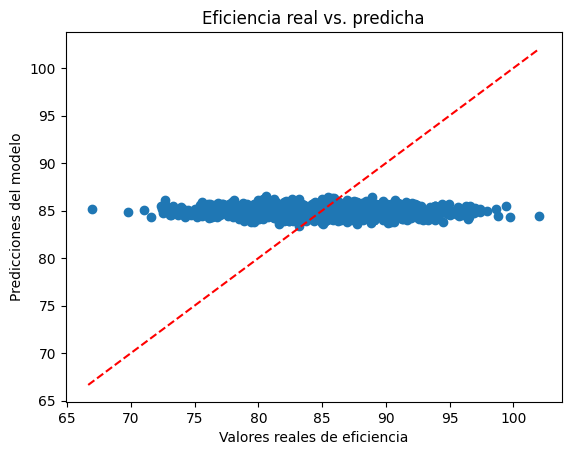

In [388]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales de eficiencia")
plt.ylabel("Predicciones del modelo")
plt.title("Eficiencia real vs. predicha")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


Debido a que los datos tienen un r^2 inocuo, ingresaremos las variables categóricas. Primero cambiaremos las variables a valores entre 0 y 1.

/tmp/ipython-input-396-3304132300.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=coef_df_sorted, palette='coolwarm')


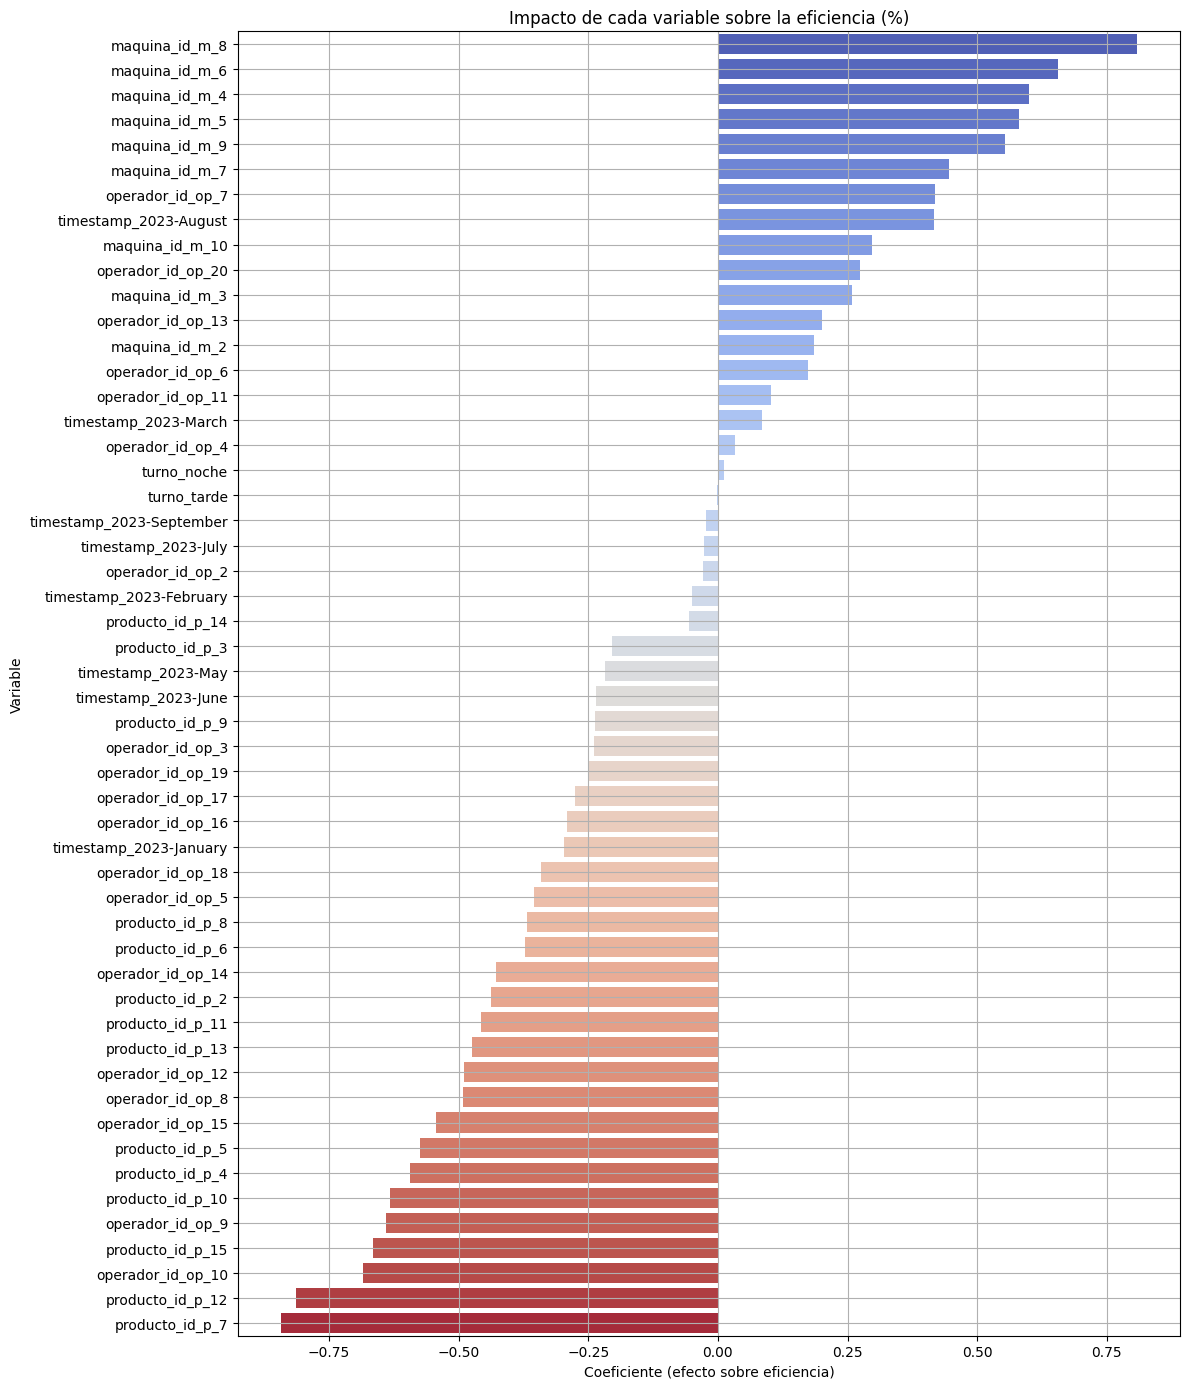

In [396]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
})
# Ordenar por el valor del coeficiente
coef_df_sorted = coef_df.sort_values(by='Coeficiente', ascending=False)

# Tamaño del gráfico
plt.figure(figsize=(12, 14))

# Gráfico de barras horizontal
sns.barplot(x='Coeficiente', y='Variable', data=coef_df_sorted, palette='coolwarm')

# Estética
plt.title('Impacto de cada variable sobre la eficiencia (%)')
plt.xlabel('Coeficiente (efecto sobre eficiencia)')
plt.ylabel('Variable')
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

Separamos por variables.

/tmp/ipython-input-400-2617928727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=df_sorted, palette='coolwarm')


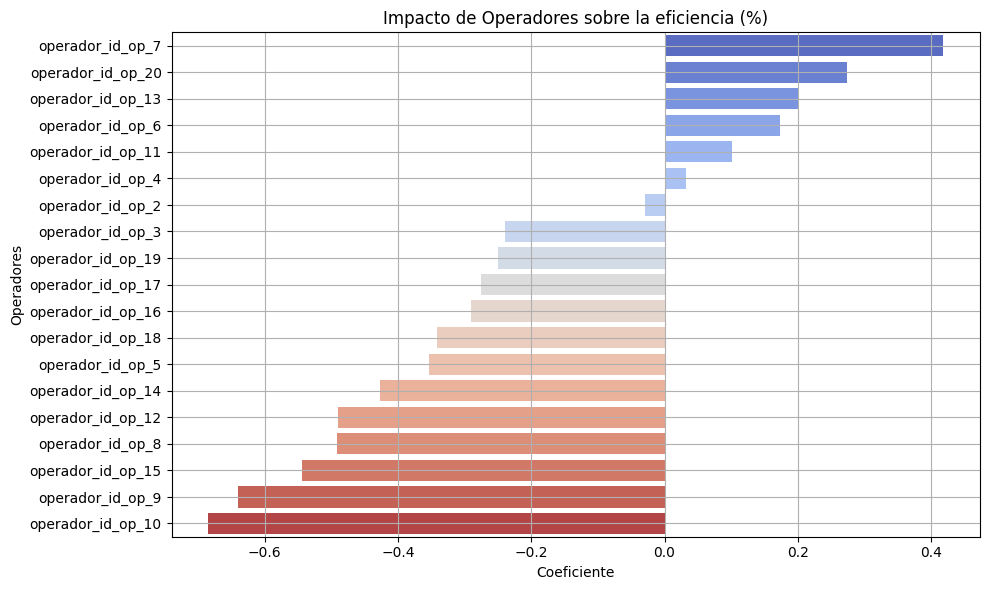

/tmp/ipython-input-400-2617928727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=df_sorted, palette='coolwarm')


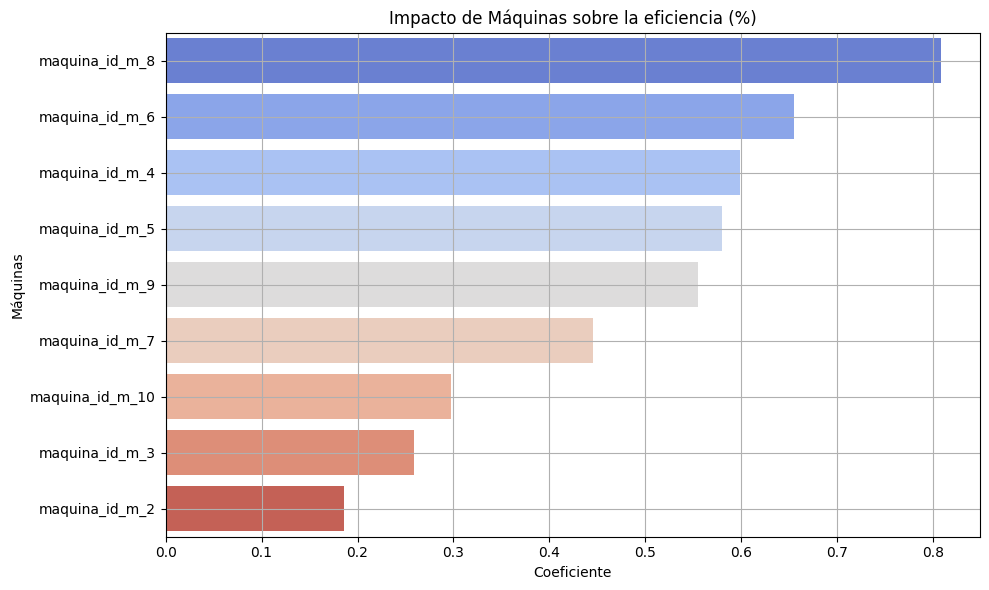

/tmp/ipython-input-400-2617928727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=df_sorted, palette='coolwarm')


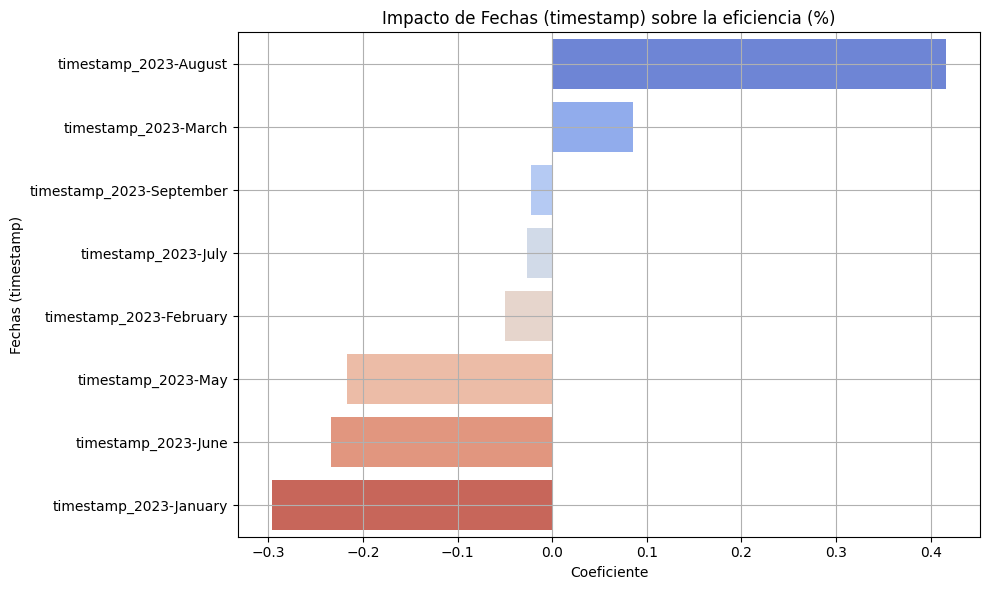

/tmp/ipython-input-400-2617928727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=df_sorted, palette='coolwarm')


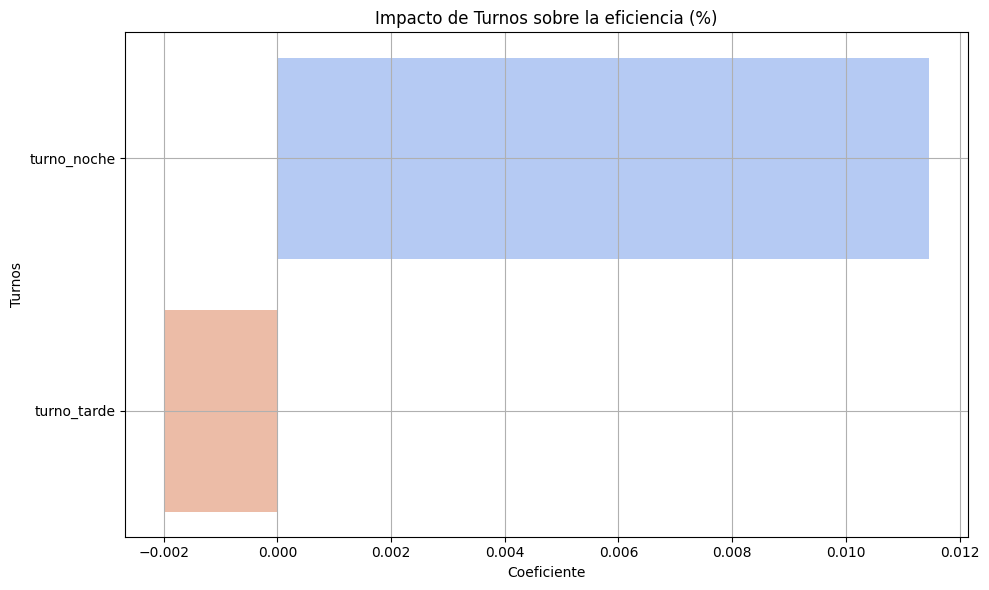

/tmp/ipython-input-400-2617928727.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=df_sorted, palette='coolwarm')


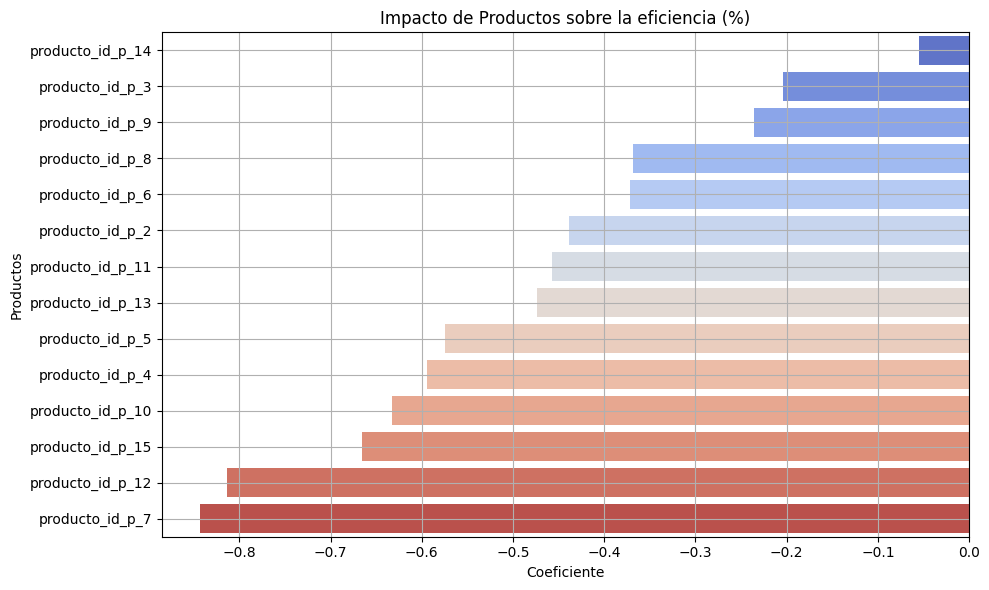

In [400]:
# Filtrar coeficientes por tipo de variable
operadores  = coef_df[coef_df['Variable'].str.startswith('operador_id')]
maquinas    = coef_df[coef_df['Variable'].str.startswith('maquina_id')]
fechas      = coef_df[coef_df['Variable'].str.startswith('timestamp')]
turnos      = coef_df[coef_df['Variable'].str.startswith('turno')]
productos   = coef_df[coef_df['Variable'].str.startswith('producto_id')]

def plot_coef_group(df, titulo):
    df_sorted = df.sort_values(by='Coeficiente', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coeficiente', y='Variable', data=df_sorted, palette='coolwarm')
    plt.title(f'Impacto de {titulo} sobre la eficiencia (%)')
    plt.xlabel('Coeficiente')
    plt.ylabel(titulo)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_coef_group(operadores, 'Operadores')
plot_coef_group(maquinas, 'Máquinas')
plot_coef_group(fechas, 'Fechas (timestamp)')
plot_coef_group(turnos, 'Turnos')
plot_coef_group(productos, 'Productos')


#Reporte